In [547]:
# Import the reqiured libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [548]:
price_paid = [
    services.loc[services['SERVICE_ID'] == service, 'BASE_PRICE'].values[0]
    + (np.random.randint(-10, 10) if np.random.rand() < 0.3 else 0)  # Occasional promotions
    for service in service_ids
]

In [549]:
np.random.randint(-10, 10)

4

In [708]:
# Set a random seed for reproducibility
np.random.seed(42)

# Yearly Sales Channel Data
channel_sales = {
    "Direct Sales": [49710, 50341, 44387, 43358],
    "Online Sales": [152155, 138721, 99972, 102337],
    "Retail Affiliate": [48503, 42132, 49140, 37549],
    "Spectrum Business": [5806, 6140, 8871, 8818],
    "SSPP": [10388, 31848, 55336, 61634],
    "STVA": [25609, 26742, 20490, 32716],
}

# Calculate daily sales for each channel (averaged over 4 years)
total_years = 4
daily_sales = {channel: sum(sales) / (365 * total_years) for channel, sales in channel_sales.items()}

# Normalize weights for daily sampling (used for channel-based selection)
daily_weights = {channel: count / sum(daily_sales.values()) for channel, count in daily_sales.items()}

# Services Table
services = pd.DataFrame({
    "SERVICE_ID": ["S001", "S002", "S003", "S004", "S005"],
    "SERVICE_NAME": ["100 Mbps Internet", "200 Mbps Internet", "300 Mbps Internet",
                     "200 Mbps + TV Bundle", "Premium Triple Play Bundle"],
    "CATEGORY": ["Basic Internet", "Speed Upgrade", "Speed Upgrade", "Bundle", "Bundle"],
    "SERVICE_TYPE": ['Fiber', 'Cable', 'Fiber', 'Cable + TV', 'Fiber + TV + Phone'],
    "CONTRACT_TERM": [12, 12, 24, 12, 24],
    "BASE_PRICE": [49.99, 69.99, 89.99, 99.99, 129.99]
})

# Transaction generation (let's generate 10,000 transactions)
transaction_dates = pd.date_range("2024-01-01", "2024-12-31", freq='D')
num_transactions = 10000  # Adjust as needed for testing
transaction_dates = np.random.choice(transaction_dates, size=num_transactions)

# Generate sales channels based on daily weights
sales_channels = np.random.choice(list(daily_weights.keys()), size=num_transactions, p=list(daily_weights.values()))

# Service mapping to sales channels
service_mapping = {
    "Direct Sales": ["S004", "S005", "S003"],
    "Online Sales": ["S001", "S002", "S003"],
    "Retail Affiliate": ["S001", "S004", "S005"],
    "Spectrum Business": ["S004", "S005"],
    "SSPP": ["S001", "S003", "S005"],
    "STVA": ["S004", "S005"],
}

# Service assignment per sales channel
service_ids = [np.random.choice(service_mapping[channel]) for channel in sales_channels]

# Generate prices based on service base price and some price changes
price_paid = [
    services.loc[services['SERVICE_ID'] == service, 'BASE_PRICE'].values[0]
    + (np.random.randint(-10, 10) if np.random.rand() < 0.6 else np.random.randint(-2,2))  # Occasional promotions
    for service in service_ids
]

# Adjust quantities based on channels and services (using mean and variation)
quantity_sold = []
for service, channel in zip(service_ids, sales_channels):
    # Calculate expected daily sales quantity for the channel
    daily_quantity = daily_sales[channel]
    
    # For bundles, scale the daily quantity a bit higher
    if service in ["S004", "S005"]:  # Bundles
        if channel == "Direct Sales":
            base_quantity = daily_quantity * 1.5
        elif channel == "Spectrum Business":
            base_quantity = daily_quantity * 2
        elif channel == "STVA":
            base_quantity = daily_quantity * 1.5
        else:
            base_quantity = daily_quantity * 1.2
    else:  # Basic Internet or speed upgrade
        if channel == "Online Sales":
            base_quantity = daily_quantity * 1.2
        elif channel == "Retail Affiliate":
            base_quantity = daily_quantity * 1.1
        else:
            base_quantity = daily_quantity * 0.8
    std_dev = base_quantity * 0.2 
    # For each transaction, generate a single quantity (not multiple)
    quantity_sold.append(int(np.random.normal(loc=base_quantity, scale=std_dev)))

# Final Transactions DataFrame
transactions = pd.DataFrame({
    "TRANSACTION_ID": [f"T{i:05}" for i in range(1, num_transactions + 1)],
    "TRANSACTION_DATE": transaction_dates,
    "PRICE_PAID": price_paid[:num_transactions],  # Adjust if price length differs
    "QUANTITY": quantity_sold,
    "SERVICE_ID": service_ids[:num_transactions],
    "SALES_CHANNEL": sales_channels[:num_transactions]
})

# Display a preview of the final transactions table
transactions.head()


# Date Information Table
dates = pd.date_range("2024-01-01", periods=500, freq='D')
is_weekend = ["Yes" if day in [5, 6] else "No" for day in dates.dayofweek]
is_holiday = np.random.choice(["Yes", "No"], size=500, p=[0.1, 0.9])
is_promotion_day = np.random.choice(["Yes", "No"], size=500, p=[0.2, 0.8])

date_info = pd.DataFrame({
    "DATE": dates,
    "IS_WEEKEND": is_weekend,
    "IS_HOLIDAY": is_holiday,
    "IS_PROMOTION_DAY": is_promotion_day
})

# Promotions Table
promotion_ids = [f"P{i:03}" for i in range(1, 21)]
start_dates = pd.date_range("2024-01-01", periods=20, freq='15D')
end_dates = start_dates + pd.Timedelta(days=7)
discount_percent = np.random.randint(10, 31, size=20)
applicable_services = np.random.choice(["S001,S002", "S003,S004", "S005"], size=20)

promotions = pd.DataFrame({
    "PROMOTION_ID": promotion_ids,
    "START_DATE": start_dates,
    "END_DATE": end_dates,
    "DISCOUNT_PERCENT": discount_percent,
    "APPLICABLE_SERVICES": applicable_services
})

# Competitor Pricing Table
competitor_ids = [f"COMP{i:03}" for i in range(1, 11)]
service_names = ["100 Mbps Internet", "200 Mbps Internet", "300 Mbps Internet",
                 "200 Mbps + TV", "Premium Bundle"]
prices = np.random.uniform(39.99, 149.99, size=10).round(2)
speeds = np.random.choice([100, 200, 300, 400, 500], size=10)

competitor_pricing = pd.DataFrame({
    "COMPETITOR_ID": competitor_ids,
    "SERVICE_NAME": np.random.choice(service_names, size=10),
    "PRICE": prices,
    "SPEED": speeds
})

# # Preview Data
print(transactions.head())
print(services.head())


  TRANSACTION_ID TRANSACTION_DATE  PRICE_PAID  QUANTITY SERVICE_ID  \
0         T00001       2024-04-12       94.99       106       S003   
1         T00002       2024-12-14       90.99       471       S003   
2         T00003       2024-09-27      135.99        37       S005   
3         T00004       2024-04-16       68.99       537       S002   
4         T00005       2024-03-12       47.99        80       S001   

       SALES_CHANNEL  
0       Direct Sales  
1       Online Sales  
2  Spectrum Business  
3       Online Sales  
4               SSPP  
  SERVICE_ID                SERVICE_NAME        CATEGORY        SERVICE_TYPE  \
0       S001           100 Mbps Internet  Basic Internet               Fiber   
1       S002           200 Mbps Internet   Speed Upgrade               Cable   
2       S003           300 Mbps Internet   Speed Upgrade               Fiber   
3       S004        200 Mbps + TV Bundle          Bundle          Cable + TV   
4       S005  Premium Triple Play Bundle 

In [709]:
data = ['transactions',
'services',
'customer_demo',
'date_info',
'promotions',
'competitor_pricing']

<AxesSubplot: >

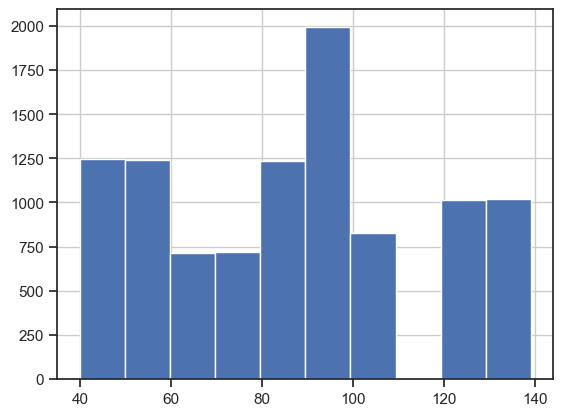

In [710]:
transactions['PRICE_PAID'].hist()

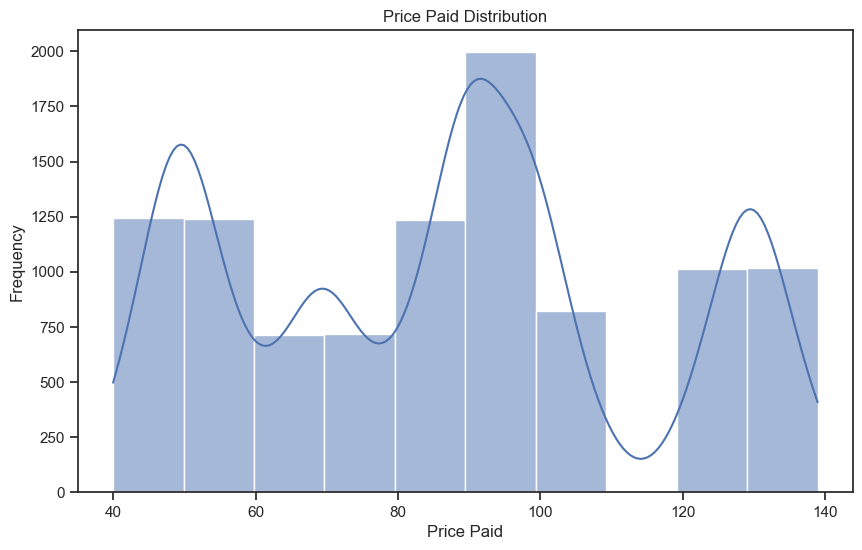

In [711]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Price Paid
plt.figure(figsize=(10,6))
sns.histplot(transactions['PRICE_PAID'], bins=10, kde=True)
plt.title('Price Paid Distribution')
plt.xlabel('Price Paid')
plt.ylabel('Frequency')
plt.show()


In [712]:
transactions['PRICE_PAID'].value_counts().iloc[:6]

89.99    369
90.99    335
88.99    330
48.99    330
47.99    321
49.99    318
Name: PRICE_PAID, dtype: int64

In [713]:
date_info['IS_HOLIDAY'] = date_info['IS_HOLIDAY'].apply(lambda x: 1 if x=='Yes' else 0)
date_info['IS_PROMOTION_DAY'] = date_info['IS_PROMOTION_DAY'].apply(lambda x: 1 if x=='Yes' else 0)
date_info['IS_WEEKEND'] = date_info['IS_WEEKEND'].apply(lambda x: 1 if x=='Yes' else 0)

In [714]:
data

['transactions',
 'services',
 'customer_demo',
 'date_info',
 'promotions',
 'competitor_pricing']

In [715]:
customer_demo['INCOME_BRACKET'] = customer_demo['INCOME_BRACKET'].apply(lambda x: 1 if x=='Medium' else (0 if x=='Low' else 2))

In [716]:
merged_df = pd.merge(transactions, services, on='SERVICE_ID', how='left')
merged_df = pd.merge(merged_df, date_info, left_on='TRANSACTION_DATE', right_on='DATE', how='left')
promotions['APPLICABLE_SERVICES'] = promotions["APPLICABLE_SERVICES"].str.split(',')
expanded_promotions = promotions.explode('APPLICABLE_SERVICES')
merged_df = pd.merge(merged_df, expanded_promotions, left_on='SERVICE_ID', right_on='APPLICABLE_SERVICES', how='left')
merged_df = pd.merge(merged_df, competitor_pricing, on='SERVICE_NAME', how='left')

<AxesSubplot: >

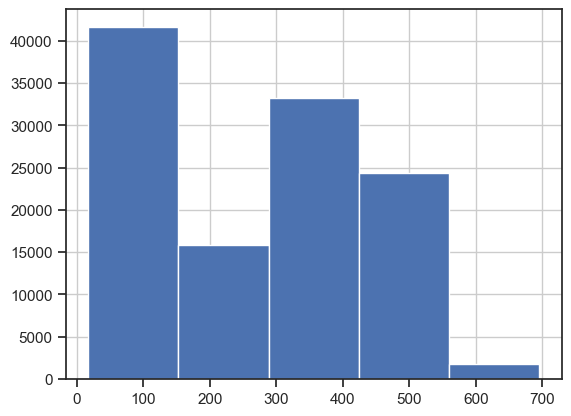

In [717]:
merged_df['QUANTITY'].hist(bins=5)

<AxesSubplot: xlabel='PRICE_PAID', ylabel='Count'>

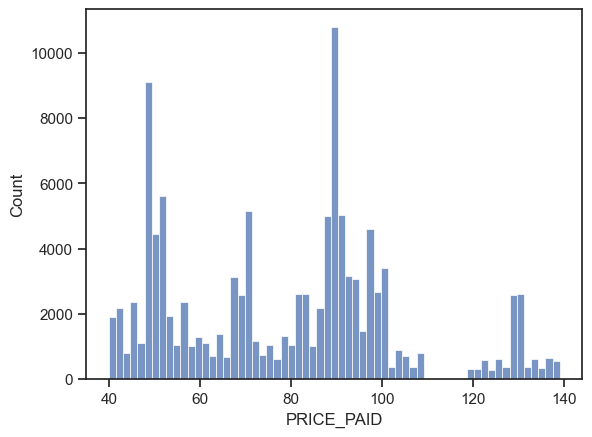

In [718]:
sns.histplot(merged_df['PRICE_PAID'])

<AxesSubplot: xlabel='PRICE_PAID'>

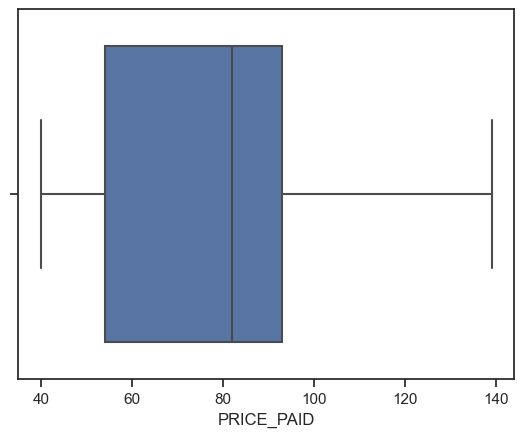

In [719]:
# Visualize distributions
sns.boxplot(x=merged_df['PRICE_PAID'])

# Skewness check
# merged_df['PRICE_PAID'].skew()

<AxesSubplot: xlabel='CATEGORY', ylabel='count'>

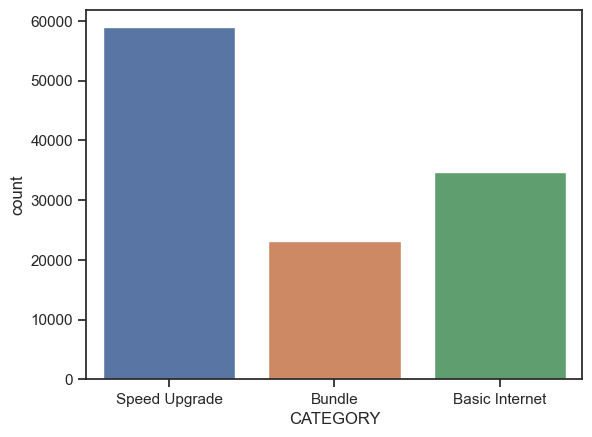

In [720]:
# Count plot for categorical variables
sns.countplot(x='CATEGORY', data=merged_df)

<AxesSubplot: >

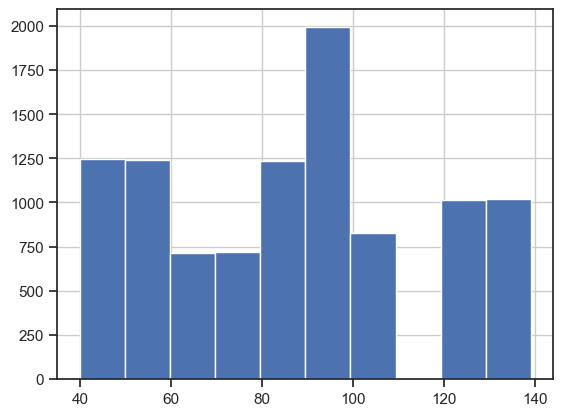

In [722]:
transactions['PRICE_PAID'].hist()

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_12887/243481026.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


<AxesSubplot: xlabel='PRICE_PAID', ylabel='QUANTITY'>

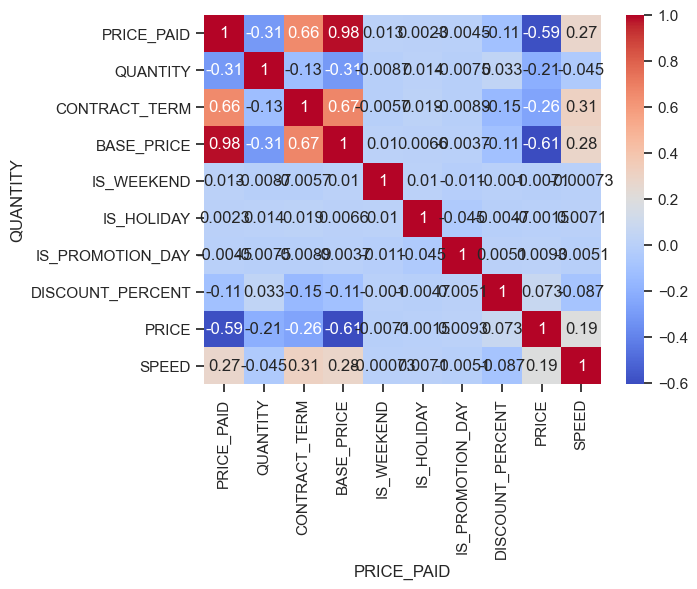

In [724]:
# Correlation heatmap
import seaborn as sns
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Scatter plot for highly correlated variables
sns.scatterplot(x='PRICE_PAID', y='QUANTITY', data=merged_df)


<AxesSubplot: xlabel='TRANSACTION_DATE'>

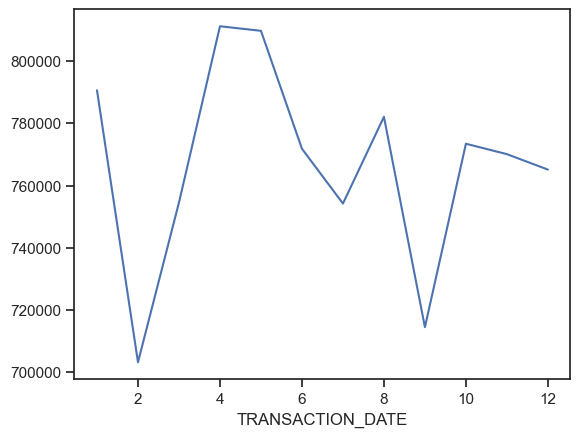

In [725]:
merged_df.groupby(merged_df['TRANSACTION_DATE'].dt.month)['PRICE_PAID'].sum().plot()

In [726]:
# Identify outliers using IQR
Q1 = merged_df['PRICE_PAID'].quantile(0.25)
Q3 = merged_df['PRICE_PAID'].quantile(0.75)
IQR = Q3 - Q1
outliers = merged_df[(merged_df['PRICE_PAID'] < (Q1 - 1.5 * IQR)) | (merged_df['PRICE_PAID'] > (Q3 + 1.5 * IQR))]


In [727]:
# sns.pairplot(merged_df)

In [728]:
merged_df.columns

Index(['TRANSACTION_ID', 'TRANSACTION_DATE', 'PRICE_PAID', 'QUANTITY',
       'SERVICE_ID', 'SALES_CHANNEL', 'SERVICE_NAME', 'CATEGORY',
       'SERVICE_TYPE', 'CONTRACT_TERM', 'BASE_PRICE', 'DATE', 'IS_WEEKEND',
       'IS_HOLIDAY', 'IS_PROMOTION_DAY', 'PROMOTION_ID', 'START_DATE',
       'END_DATE', 'DISCOUNT_PERCENT', 'APPLICABLE_SERVICES', 'COMPETITOR_ID',
       'PRICE', 'SPEED'],
      dtype='object')

In [729]:
services

,SERVICE_ID,SERVICE_NAME,CATEGORY,SERVICE_TYPE,CONTRACT_TERM,BASE_PRICE
0,S001,100 Mbps Internet,Basic Internet,Fiber,12,49.99
1,S002,200 Mbps Internet,Speed Upgrade,Cable,12,69.99
2,S003,300 Mbps Internet,Speed Upgrade,Fiber,24,89.99
3,S004,200 Mbps + TV Bundle,Bundle,Cable + TV,12,99.99
4,S005,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,129.99


In [730]:
customer_demo.select_dtypes('object').columns

Index(['CUSTOMER_ID'], dtype='object')

In [731]:
data

['transactions',
 'services',
 'customer_demo',
 'date_info',
 'promotions',
 'competitor_pricing']

In [732]:
competitor_pricing.select_dtypes('object').columns

Index(['COMPETITOR_ID', 'SERVICE_NAME'], dtype='object')

In [733]:
merged_df

,TRANSACTION_ID,TRANSACTION_DATE,PRICE_PAID,QUANTITY,SERVICE_ID,SALES_CHANNEL,SERVICE_NAME,CATEGORY,SERVICE_TYPE,CONTRACT_TERM,...,IS_HOLIDAY,IS_PROMOTION_DAY,PROMOTION_ID,START_DATE,END_DATE,DISCOUNT_PERCENT,APPLICABLE_SERVICES,COMPETITOR_ID,PRICE,SPEED
0,T00001,2024-04-12,94.99,106,S003,Direct Sales,300 Mbps Internet,Speed Upgrade,Fiber,24,...,0,0,P001,2024-01-01,2024-01-08,14,S003,COMP007,81.80,200.0
1,T00001,2024-04-12,94.99,106,S003,Direct Sales,300 Mbps Internet,Speed Upgrade,Fiber,24,...,0,0,P001,2024-01-01,2024-01-08,14,S003,COMP010,116.08,400.0
2,T00001,2024-04-12,94.99,106,S003,Direct Sales,300 Mbps Internet,Speed Upgrade,Fiber,24,...,0,0,P003,2024-01-31,2024-02-07,24,S003,COMP007,81.80,200.0
3,T00001,2024-04-12,94.99,106,S003,Direct Sales,300 Mbps Internet,Speed Upgrade,Fiber,24,...,0,0,P003,2024-01-31,2024-02-07,24,S003,COMP010,116.08,400.0
4,T00001,2024-04-12,94.99,106,S003,Direct Sales,300 Mbps Internet,Speed Upgrade,Fiber,24,...,0,0,P004,2024-02-15,2024-02-22,14,S003,COMP007,81.80,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116833,T10000,2024-01-13,82.99,405,S003,Online Sales,300 Mbps Internet,Speed Upgrade,Fiber,24,...,0,0,P017,2024-08-28,2024-09-04,28,S003,COMP010,116.08,400.0
116834,T10000,2024-01-13,82.99,405,S003,Online Sales,300 Mbps Internet,Speed Upgrade,Fiber,24,...,0,0,P018,2024-09-12,2024-09-19,18,S003,COMP007,81.80,200.0
116835,T10000,2024-01-13,82.99,405,S003,Online Sales,300 Mbps Internet,Speed Upgrade,Fiber,24,...,0,0,P018,2024-09-12,2024-09-19,18,S003,COMP010,116.08,400.0
116836,T10000,2024-01-13,82.99,405,S003,Online Sales,300 Mbps Internet,Speed Upgrade,Fiber,24,...,0,0,P020,2024-10-12,2024-10-19,10,S003,COMP007,81.80,200.0


In [734]:
services.describe(include=['O'])

,SERVICE_ID,SERVICE_NAME,CATEGORY,SERVICE_TYPE
count,5,5,5,5
unique,5,5,3,4
top,S001,100 Mbps Internet,Speed Upgrade,Fiber
freq,1,1,2,2


In [735]:
services

,SERVICE_ID,SERVICE_NAME,CATEGORY,SERVICE_TYPE,CONTRACT_TERM,BASE_PRICE
0,S001,100 Mbps Internet,Basic Internet,Fiber,12,49.99
1,S002,200 Mbps Internet,Speed Upgrade,Cable,12,69.99
2,S003,300 Mbps Internet,Speed Upgrade,Fiber,24,89.99
3,S004,200 Mbps + TV Bundle,Bundle,Cable + TV,12,99.99
4,S005,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,129.99


/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_12887/1237269901.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')


<AxesSubplot: >

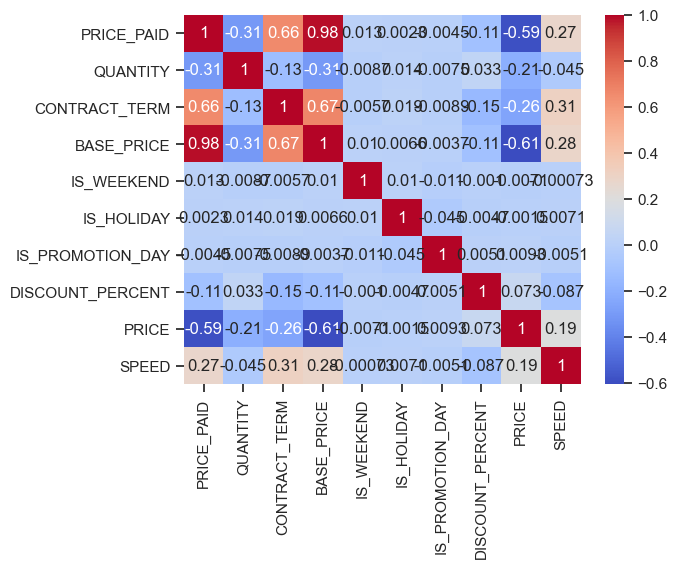

In [736]:
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')

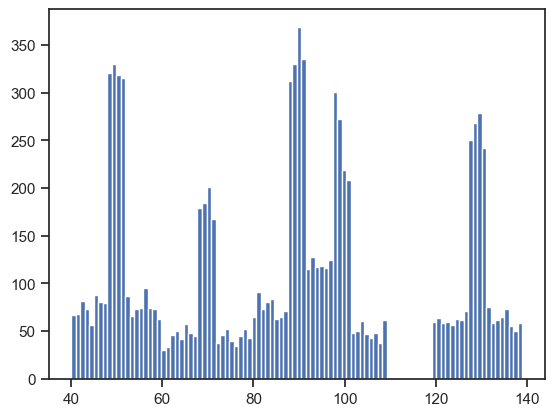

In [737]:
plt.hist(transactions['PRICE_PAID'], bins=100)  
plt.show()

In [738]:
df_300_online = merged_df[(merged_df['SALES_CHANNEL'] == 'Online Sales') & (merged_df['SERVICE_NAME'] == '300 Mbps Internet')]

<AxesSubplot: xlabel='PRICE_PAID', ylabel='Count'>

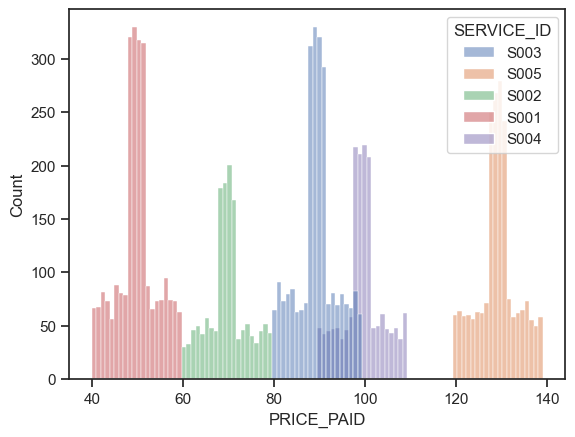

In [739]:
sns.histplot(data=transactions, x='PRICE_PAID', hue='SERVICE_ID', bins=100, kde=False)

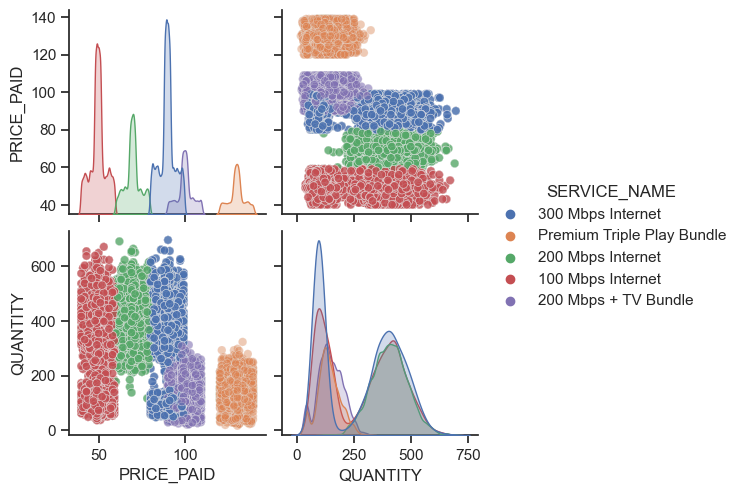

In [740]:
sns.pairplot(merged_df[['PRICE_PAID','QUANTITY','SERVICE_NAME']], hue='SERVICE_NAME', plot_kws={'alpha':.1})

<AxesSubplot: xlabel='QUANTITY', ylabel='Count'>

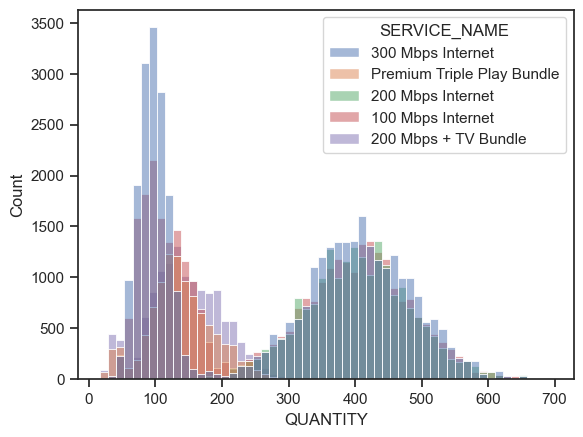

In [741]:
sns.histplot(x='QUANTITY', hue='SERVICE_NAME', data=merged_df)

In [742]:
pd.concat([services.SERVICE_ID, pd.get_dummies(services.SERVICE_NAME)]).groupby(services.SERVICE_ID).sum()

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_12887/3580783657.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.concat([services.SERVICE_ID, pd.get_dummies(services.SERVICE_NAME)]).groupby(services.SERVICE_ID).sum()


,100 Mbps Internet,200 Mbps + TV Bundle,200 Mbps Internet,300 Mbps Internet,Premium Triple Play Bundle
SERVICE_ID,,,,,
S001,1.0,0.0,0.0,0.0,0.0
S002,0.0,0.0,1.0,0.0,0.0
S003,0.0,0.0,0.0,1.0,0.0
S004,0.0,1.0,0.0,0.0,0.0
S005,0.0,0.0,0.0,0.0,1.0


<AxesSubplot: xlabel='PRICE_PAID', ylabel='Count'>

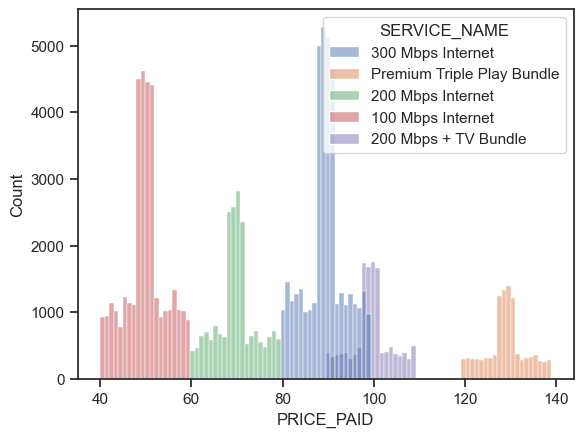

In [743]:
sns.histplot(data=merged_df, x='PRICE_PAID', hue='SERVICE_NAME', bins=100, kde=False)

In [744]:
pd.concat([services.SERVICE_ID, pd.get_dummies(services.SERVICE_ID)]).groupby(services.SERVICE_ID).sum()

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_12887/90092386.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.concat([services.SERVICE_ID, pd.get_dummies(services.SERVICE_ID)]).groupby(services.SERVICE_ID).sum()


,S001,S002,S003,S004,S005
SERVICE_ID,,,,,
S001,1.0,0.0,0.0,0.0,0.0
S002,0.0,1.0,0.0,0.0,0.0
S003,0.0,0.0,1.0,0.0,0.0
S004,0.0,0.0,0.0,1.0,0.0
S005,0.0,0.0,0.0,0.0,1.0


In [745]:
merged_df[merged_df['SERVICE_ID']=='S005']

,TRANSACTION_ID,TRANSACTION_DATE,PRICE_PAID,QUANTITY,SERVICE_ID,SALES_CHANNEL,SERVICE_NAME,CATEGORY,SERVICE_TYPE,CONTRACT_TERM,...,IS_HOLIDAY,IS_PROMOTION_DAY,PROMOTION_ID,START_DATE,END_DATE,DISCOUNT_PERCENT,APPLICABLE_SERVICES,COMPETITOR_ID,PRICE,SPEED
32,T00003,2024-09-27,135.99,37,S005,Spectrum Business,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,...,0,1,P005,2024-03-01,2024-03-08,18,S005,NaN,NaN,NaN
33,T00003,2024-09-27,135.99,37,S005,Spectrum Business,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,...,0,1,P009,2024-04-30,2024-05-07,24,S005,NaN,NaN,NaN
34,T00003,2024-09-27,135.99,37,S005,Spectrum Business,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,...,0,1,P011,2024-05-30,2024-06-06,27,S005,NaN,NaN,NaN
35,T00003,2024-09-27,135.99,37,S005,Spectrum Business,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,...,0,1,P013,2024-06-29,2024-07-06,16,S005,NaN,NaN,NaN
36,T00003,2024-09-27,135.99,37,S005,Spectrum Business,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,...,0,1,P019,2024-09-27,2024-10-04,29,S005,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116777,T09996,2024-01-23,129.99,146,S005,Retail Affiliate,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,...,0,0,P005,2024-03-01,2024-03-08,18,S005,NaN,NaN,NaN
116778,T09996,2024-01-23,129.99,146,S005,Retail Affiliate,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,...,0,0,P009,2024-04-30,2024-05-07,24,S005,NaN,NaN,NaN
116779,T09996,2024-01-23,129.99,146,S005,Retail Affiliate,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,...,0,0,P011,2024-05-30,2024-06-06,27,S005,NaN,NaN,NaN
116780,T09996,2024-01-23,129.99,146,S005,Retail Affiliate,Premium Triple Play Bundle,Bundle,Fiber + TV + Phone,24,...,0,0,P013,2024-06-29,2024-07-06,16,S005,NaN,NaN,NaN


In [767]:
price_mode = ols("QUANTITY ~ PRICE", data=merged_df[merged_df['SERVICE_ID']=='S005']).fit()
print(price_mode.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(price_mode,  fig=fig)

ValueError: zero-size array to reduction operation maximum which has no identity

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

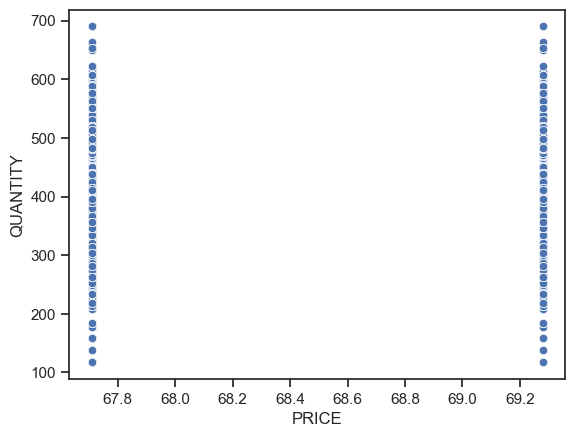

In [771]:
sns.scatterplot(y='QUANTITY',x='PRICE',data=merged_df[merged_df['SERVICE_ID']=='S002'])

In [755]:
merged_df['SALES_CHANNEL'].unique()

array(['Direct Sales', 'Online Sales', 'Spectrum Business', 'SSPP',
       'STVA', 'Retail Affiliate'], dtype=object)

In [766]:
merged_df['SERVICE_ID'].unique()

array(['S003', 'S005', 'S002', 'S001', 'S004'], dtype=object)